<a href="https://colab.research.google.com/github/pyhtonman0101/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Mohd_Zahid_Ansari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name-** Mohd Zahid Ansari
##### **Email-** mohdzahidansari3@gmail.com 

# **Project Summary -**

As of Q2 of 2022, Netflix boasts a staggering 220 million subscribers, making it the largest online streaming service provider in the world. To prevent subscriber churn and enhance the user experience, it's crucial for Netflix to effectively group the shows available on their platform.

By creating clusters, we can gain insight into which shows are similar and which are distinct from one another. This clustering can then be used to offer personalized show recommendations to users based on their preferences.

The main objective of this project is to classify and group Netflix shows into distinct clusters, where shows within the same cluster share similarities, and those in different clusters are dissimilar to one another.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
In this project, you are required to do
*   Exploratory Data Analysis
*   Understanding what type content is available in different countries
*   If Netflix has been increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features

### **Dataset Description**
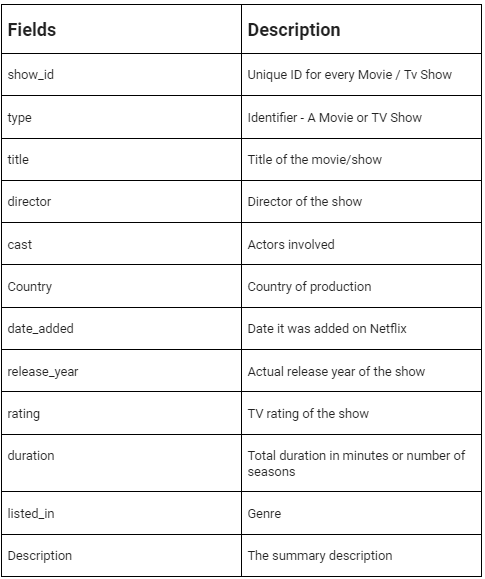

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import string
import unicodedata
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

#Import NLP libraries 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from sklearn.decomposition import PCA

#Import UnSupervised ML modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples

#The default figure size to 8 inches by 5 inches and the figure resolution (dots per inch) to 100.
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#Mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Netflix Movies and TV Shows Clustering - Mohd Zahid Ansari/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', parse_dates=['date_added'])

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

In [ ]:
df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Dublicate values in our dataset is {len(df[df.duplicated()])}')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

We obserb these things in our dataset:


*   There are 7787 rows and 12 features(columns) in our dataset.
*   In the dataset, there are missing values for some features. The feature with the highest number of missing values is "director" with 2389, followed by "cast" with 718 and "country" with 507 missing values.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description 

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genre

**description:** The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Genre of shows
df.listed_in.value_counts()

In [ ]:
# contry in which a movie was produced
df.country.value_counts()

There are some values where there are more countries and genre than one. So we have to seperate them.

In [ ]:
# fill country feature with highest frequency of country occured in the column.
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
# Genre of shows
df.listed_in.value_counts()

In [ ]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()
     

In [ ]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

In [ ]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [ ]:
# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [ ]:
# Age ratings
df.rating.value_counts()

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

In [ ]:
# Age ratings
df.rating.value_counts()

### What all manipulations have you done and insights you found?

*   Some movies/TV shows have been filmed in multiple countries and have been associated with multiple genres.
*   The majority of shows on Netflix are rated TV-MA, followed by TV-14 and TV-PG, according to ratings data.
*   Roughly 50% of shows on Netflix are produced for an adult audience, with young adults, older kids, and kids following in terms of numbers. Teenage-specific shows are the least common on Netflix compared to other age groups.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['rating'].value_counts().index, y=df['rating'].value_counts().values, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.xticks(rotation=30)
plt.show()

##### 1. Why did you pick the specific chart?

To analyse Rating based on rating categories of all TV Shows.

##### 2. What is/are the insight(s) found from the chart?

There are more movies and shows of adult rating type and lowest content for teens.

#### Chart - 2

In [ ]:
# Percentage of Movies and TV Shows in the dataset
plt.figure(figsize=(8,8))
df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

Pie plot is a good way to represent ratio of the values of a column.

##### 2. What is/are the insight(s) found from the chart?

Netflix has a greater number of movies than TV shows, with 69% movies and 31% TV shows.

#### Chart - 3

In [ ]:
#Analysing Movies and TV Shows by year  
plt.figure(figsize=(12,5))      
moviesByYear = df[df['type']=='Movie']['release_year'].value_counts().sort_index(ascending=False)
tvShowsByYear = df[df['type']=='TV Show']['release_year'].value_counts().sort_index(ascending=False)
moviesByYear.plot(linewidth=2.5, color='maroon',label="Movies")
tvShowsByYear.plot(linewidth=2.5, color='blue',label="TV Shows")
plt.xlabel("Years")
plt.ylabel("Number")
plt.title("Production growth by year");
plt.legend()

##### 1. Why did you pick the specific chart?

Line plots are used to show trends and changes over time for a single variable or for multiple variables, and to identify patterns or relationships between them.

##### 2. What is/are the insight(s) found from the chart?

Production of movies started mainly started from 2000's and TV shows were mainly produced from the year 2008.

#### Chart - 4

In [ ]:
#Bivariate analyses on top 10 countries with most content
plt.figure(figsize=(15,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:10],hue=df['type'], palette='viridis')
plt.xticks(rotation=40)
plt.title('Top 10 countries with most content', fontsize=15, fontweight='bold')

##### 1. Why did you pick the specific chart?

Bar plots are useful for displaying and comparing categorical data, especially when the categories are discrete and easy to understand. They are commonly used to show counts or percentages of occurrences.

Here we want to compare which are top 10 countries producing more content.

##### 2. What is/are the insight(s) found from the chart?

USA has highest number of Films and TV-shows, but in India Films are made on a large scale as compared to TV-shows followed by UK, Japan, South Korea and so on.

#### Chart - 5

In [ ]:
#Analysing top10 genre of the movies
movies=df[df['type']=='Movie']
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],palette="cubehelix")

##### 1. Why did you pick the specific chart?

A countplot is a specific type of bar plot that displays the number of occurrences of each category in a categorical dataset. It is useful for visualizing frequency distributions and identifying the most common categories in the data.

##### 2. What is/are the insight(s) found from the chart?

The entertainment industry produces a variety of popular genres, with documentaries, stand-up comedy, and drama movies and TV shows being among the most prominent. Additionally, there is a significant production of content geared towards children and families, such as kid's TV shows and children & family movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above plot we can see that documentaries, stand-up comedy, and drama movies and TV shows genre is producing in high number, so we should create more drama if audience love it.

#### Chart - 6

In [ ]:
#Bivariate analyses on Movies and TV Shows by month 
plt.figure(figsize=(15,6))
p = sns.countplot(x='month_added', hue='type', data=df, palette="cubehelix")
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()+5), ha = 'center', va = 'center')

##### 1. Why did you pick the specific chart?

Bar plots are useful for displaying and comparing categorical data, especially when the categories are discrete and easy to understand. They are commonly used to show counts or percentages of occurrences.

Here we want to compare in which months TV shows and movies are released.

##### 2. What is/are the insight(s) found from the chart?

Here we can derive an analysis that content is mainly released from October to January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Producer should work more on content releasing on last quarter of the year. Because there is holiday in these months and audience are free for entertainment.

#### Chart - 7

In [ ]:
#Analysing top 10 genre of the content created
plt.figure(figsize=(15,6))
plt.title('Top 10 Genre of Content')
sns.countplot(y=df['listed_in'], order=df['listed_in'].value_counts().index[0:10], palette="cubehelix")

In [ ]:
#Analysing top 10 genre of the tv_shows
tv_shows=df[df['type']=='TV Show']
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of tv_shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10],palette="cubehelix")

##### 1. Why did you pick the specific chart?

A countplot is a specific type of bar plot that displays the number of occurrences of each category in a categorical dataset. It is useful for visualizing frequency distributions and identifying the most common categories in the data.

##### 2. What is/are the insight(s) found from the chart?

The entertainment industry produces a variety of popular genres, including drama, comedy, documentaries, action and adventure, and TV shows. There is also a significant production of content aimed at children and families, such as kid's TV shows and children & family movies.

Among TV shows, Kids TV and international TV shows are the most numerous genre.

#### Chart - 8

In [ ]:
#Visualizing TV Shows released seasons 
plt.figure(figsize=(15,6))
plt.title("Distribution of TV Shows duration")
p = sns.barplot(x = df[df['type']=='TV Show']['duration'].value_counts().index, y = df[df['type']=='TV Show']['duration'].value_counts().values)
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()+10), ha = 'center', va = 'center')

##### 1. Why did you pick the specific chart?

Bar plots are useful for displaying and comparing categorical data, especially when the categories are discrete and easy to understand. They are commonly used to show counts or percentages of occurrences.

##### 2. What is/are the insight(s) found from the chart?

Here we can conclude that most of the TV Shows launch their 1st Season and if that is hit only then next seasons are planned and created. Therefore we can see there are almost 1600 1st Season count and only 380 2nd Season.   

#### Chart - 9

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

##### 1. Why did you pick the specific chart?

A countplot is a specific type of bar plot that displays the number of occurrences of each category in a categorical dataset. It is useful for visualizing frequency distributions and identifying the most common categories in the data.

I used this chart for analysing Top actors of TV shows

##### 2. What is/are the insight(s) found from the chart?

david attenborough has been appeared in more than 12 tv shows.

#### Chart - 10

In [ ]:
# Fill missing values in cast with no cast
df['cast'].fillna(value='No Cast',inplace=True)
#converting cast feature into a cast list
df['cast'] = df['cast'].apply(lambda x: x.split(','))

In [ ]:
#writing a function to make a dictionary of actors and the count of movies or Tv shows they have appeared in.
def actor_count(df):
    from collections import defaultdict
    actor_dict = defaultdict(int)

    for actors in df['cast']:
        for actor in actors:
            actor_dict[actor.strip()] += 1

    return actor_dict

#Calling the function
actor_counts = actor_count(df)

In [ ]:
#Sorting the tuples in the dictionary
top_20_actors = sorted(actor_counts.items(), key=lambda x: x[1], reverse=True)[1:20]
#Converting the tuple list into a dict
actor_dict = {actor: count for actor, count in top_20_actors}
#Creating a dataframe of the dict
topActors = pd.DataFrame({'Actor': list(actor_dict.keys()), 'Number of Films': list(actor_dict.values())})

In [ ]:
#plotting the top Actors dataframe as a barchart
plt.figure(figsize=(15,6))
sns.barplot(x='Actor', y='Number of Films', data=topActors, palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Based on the data, Anupam Kher tops the list with the most number of films, having acted in 42 productions. Shah Rukh Khan and Naseeruddin Shah come in close behind, having featured in 35 and 30 films respectively. Om Puri also appears on the list, having acted in 30 films. These actors have solidified their standing as notable figures in the film industry, having built up an impressive body of work.

#### Chart - 11

In [ ]:
# Top directors w.r.t to films directed
plt.figure(figsize=(15,5))
sns.barplot(x=df['director'].value_counts()[:10].index, y=df['director'].value_counts()[:10].values, palette="cubehelix")
plt.xticks(rotation=50)

##### 2. What is/are the insight(s) found from the chart?

Raúl Campos and Jan Suter have directed the highest number of films i.e. 18 films. Marcus Raboy is close behind with 16 films. Jay Karas and Cathy Garcia-Molina have directed 14 and 13 films respectively.

#### Chart - 12

In [ ]:
#Comparing 'release_year' and 'year' columns and assigning Yes / No as a value
df['originals'] = np.where(df['release_year'] == df['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
ax.pie(df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color':"black", 'fontsize': 20})
plt.show()

##### 2. What is/are the insight(s) found from the chart?

36.28 % of content is Netflix original and 63.72 % is produced and released by different modes.

#### Chart - 13 - Correlation Heatmap

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

In [ ]:
#Adding a count column as 1 so as to group the countries and get a total count for the corresponding country 
df['count'] = 1
#Getting the top 10 countries by count
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
#Filtering the original dataframe based on the values of the "country" column.
df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['rating'],normalize = "index").T
df_heatmap

Note: 'pd.crosstab' is a Pandas function used to create a cross-tabulation table from two or more categorical variables. It is used to calculate the number of observations for each combination of categories in the variables. It returns a DataFrame that displays the results of the cross-tabulation in a tabular format.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
#Getting list of top contries by crosstab matrix
country_order = df_heatmap.columns.tolist()
#Getting list of age order by crosstab matrix
age_order = df_heatmap.index.tolist()
# Plotting the heatmap
sns.heatmap(df_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True, cmap = 'Blues')

##### 1. Why did you pick the specific chart?

Heatmaps are used to visually represent data using colors to show the intensity of values in a two-dimensional matrix. They are widely used in data analysis to identify patterns, correlations, and anomalies in data sets, and to make data-driven decisions based on the insights gained from the visualization.

##### 2. What is/are the insight(s) found from the chart?

The top 5 highest percentage values represent the most dominant rating category in each country. For example, in Spain the highest percentage is 84% for Adults rating, followed by 4.5% for Older Kids, 9% for Young Adults, 0.75% for Teens and 2.2% for Kids.

The US and UK are closely aligned with their Netflix target ages

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

A pair plot is a scatterplot matrix that displays the pairwise relationships between variables in a dataset. It allows for the visualization of the relationships between multiple variables simultaneously, aiding in the identification of patterns and trends in the data.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# We have earlier dealt with some missing values in some features for better data visualization so now again see which variables has missing values.
df.isnull().sum()

So we have missing values in directors mostly and some values missing in rating, monthly_added and year_added.

In [ ]:
# Let's fill missing values in rating with mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [ ]:
#'year_added' and 'month_added' contains small number of null values so we will drop those particular observations
df.dropna(subset=['month_added', 'year_added', 'date_added'], inplace=True)

In [ ]:
# Filling null values with blank spaces
df.fillna('',inplace=True)

In [ ]:
df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

I used mode technique to fill missing values in some features, becuase most occuring values should be use to fill missing values in our case. 

We fill blank and unknown value too in some features because in those features we can't fill values with mode and mean. It will make our data biased.

In [ ]:
#Combining all attributes for better clustering
df['cast'] = df['cast'].apply(lambda x: ' '.join(x))
df['clustering'] = (df['director'] + ' ' + df['cast'] +' ' + df['country'] +' ' + df['listed_in'] +' ' + df['description'])

In [ ]:
df.head()

In [ ]:
df['clustering'][1]

###Removing StopWords & White spaces

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)


# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)


In [ ]:
# Removing stop words
df['clustering'] = df['clustering'].apply(stopwords)


df['clustering'][1]

### Removing Non Ascii

In [ ]:
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

### Removing Punctuations

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


# Removing punctuation marks
df['clustering'] = df['clustering'].apply(remove_punctuation)


df['clustering'][1]

### Removing URLs and words contain digits.

In [ ]:
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


# remove non-ascii characters
df['clustering'] = remove_non_ascii(df['clustering'])


df['clustering'][1]

### Rephrase Text

In [ ]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas



# Lemmatization
df['clustering'] = lemmatize_verbs(df['clustering'])


df['clustering'][1]

###Lemmatization

Lemmatization is the process of reducing a word to its base or root form. Lemmatization takes into account the context and part of speech of the word, and uses a dictionary or a morphological analyzer to find the base form of the word.

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatizing the clustering column
df['clustering'] = lemmatize_verbs(df['clustering'])

In [ ]:
df['clustering'][1]

###TF - IDF Vectorization

In [ ]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 20000)
# Use the fit_transform method to transform the clustering column into a TF-IDF representation
tfidf_matrix = vectorizer.fit_transform(df['clustering'])

In [ ]:
tfidf_matrix.shape

In [ ]:
X = tfidf_matrix.toarray()
X

####Note:
TfidfVectorizer is used to convert a collection of raw text documents to a matrix of TF-IDF features. The goal of using TF-IDF instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.


In [ ]:
df.head()

###Dimensionality Reduction using PCA

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### 8. Data Splitting

In [ ]:
# Calculate the cumulative sum of explained variances
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
# Determine the number of components needed to explain at least 80% of the variance
n_components = np.argmax(cumulative_sum >= 0.8) + 1
# Re-initialize the PCA instance with the determined number of components
pca = PCA(n_components=n_components,random_state=40)
# Fit the PCA model to the data
pca.fit(X)
# Transform the data using the fitted PCA model
X_reduced = pca.transform(X)

In [ ]:
# shape of transformed vectors
print(X_reduced.shape)
X_reduced

Here we calculate the cumulative sum of explained variances and determine the number of components needed to explain at least 80% of the variance in the data. Finally, we re-initialize the PCA instance with the determined number of components and fit the model to the data again to obtain the reduced representation of the data

## ***7. ML Model Implementation***

###K-Means Clustering
K-Means Clustering is a type of unsupervised learning in machine learning, used for cluster analysis. It partitions data into K number of clusters, where each data point belongs to the cluster with the nearest mean. The algorithm iteratively updates the mean values and the cluster assignments, until the cluster means no longer change or a maximum number of iterations is reached.

## **ML Model 1: Elbow Method**

The elbow method is a technique used in machine learning for determining the optimal number of clusters to use in a clustering algorithm. It involves plotting the within-cluster sum of squares against the number of clusters and selecting the point on the plot where the decrease in sum of squares begins to level off, resembling an elbow.

In [ ]:
# Initialize an empty list to store the Within-Cluster-Sum-of-Squared (WCSS) values
wcss = []

# Loop over a range of possible number of clusters
for i in range(1, 25):
    # Initialize a KMeans instance with the specified number of clusters, using the k-means++ initialization method
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit the k-means model to the data
    kmeans.fit(X_reduced)
    # Append the WCSS value for this number of clusters to the list of WCSS values
    wcss.append(kmeans.inertia_)

# Plot the WCSS values as a function of the number of clusters
plt.plot(range(1, 25), wcss)
# Add a title, x-axis label, and y-axis label to the plot
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Display the plot
plt.show()

###Observation
Because of high degree of dimensionality in the dataset we can see no relevant elbow point being created in the above graph so we have to consider the silhouette score in this case so as to find a relevant number of clusters.

## **ML Model 2: Silhouette Score**

The Silhouette Score is a technique used in machine learning for evaluating the quality of clustering algorithms. It measures how similar an object is to its own cluster compared to other clusters, and produces a score ranging from -1 to 1. A higher score indicates better-defined clusters with objects that are more similar to each other within the same cluster.

In [ ]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,15)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initializing kmeans algo
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=0)
  kmeans.fit(X_reduced)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(X_reduced, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
X=X_reduced

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Here through Silhouette scores for n number of clusters we can conclude that cluster no 6 has highest silhouette score so we will be feeding 6 as the number of cluster for Agglomerative Hierarchical Clustering.

## **ML Model 3: Dendogram**
The dendrogram method is a technique used in machine learning to visualize the hierarchical relationship between clusters in a dataset. It involves constructing a tree-like diagram, with each branch representing a cluster and the height of the branch indicating the distance between the clusters. The dendrogram allows for easy interpretation of how data points are grouped together at different levels of granularity.

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_reduced, method ='ward')))

**Agglomerative Hierarchical Clustering**

Agglomerative Hierarchical Clustering is a method of clustering in machine learning used to group similar objects into clusters. It starts with each object as a separate cluster and iteratively merges the two closest clusters until all objects are in a single cluster. The result is a hierarchy of clusters, where the number of clusters is determined by the desired level of granularity.

In [ ]:
#Fitting our variable in Agglomerative Clusters
agg_clustering = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
agg_clustering.fit(X_reduced)
#Predicting using our model
y_hc=agg_clustering.fit_predict(X_reduced)

In [ ]:
#creating a column where each row is assigned to their separate cluster
df['cluster'] = agg_clustering.labels_

In [ ]:
#Saving final comparison_df to drive
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Netflix Movies and TV Shows Clustering - Mohd Zahid Ansari/cluster_df.csv')

In [ ]:
#Creating a checkpoint
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Netflix Movies and TV Shows Clustering - Mohd Zahid Ansari/cluster_df.csv', index_col=[0])
df.head()

###Model Visualization and Evaluation

In [ ]:
#Plotting the cluster count w.r.t content type
plt.figure(figsize=(10,5))
sns.countplot(x='cluster', data=df, hue='type')

Observation: Here we can see the clusters formed and visualize the type of content in each particular cluster.

###Content based Recommender System
A movie recommendation system that relies on content could suggest films to users by analyzing the actors, directors, genres, and keywords associated with the movies they have previously viewed. For example, if a user has watched multiple action movies of Shahrukh Khan, the system may suggest other action movies that feature Shahrukh Khan or comparable actors.

In [ ]:
# Create the feature matrix using TfidfVectorizer
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(df['clustering'])
# Compute cosine similarity
cosine_sim = cosine_similarity(feature_matrix)

In [ ]:
# Create the recommender system
indices = pd.Series(df.index, index=df['title'])

#Function to compare the cosine similarity and rank them
def recommend_items(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    item_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[item_indices]

In [ ]:
# Recommend items for a specific title
print(recommend_items('Black Mirror'))

In [ ]:
print(recommend_items('Chup Chup Ke'))

## **Observation**

As we can see we gave a specific title i.e. 'Chup Chup Ke' to the recommender system and it gave us the top 10 ranking cosine similar movie titles and their indices in the dataset.

We can confirm that the movies recommended are from a comedy and drama genre as we gave a comedy and drama movie title to the system. Hence we can conclude that our recommender system is giving us relevant results.

# **Conclusion**

Clustering is a machine learning technique used to group similar data points together based on their characteristics. It can be used to analyze and categorize Netflix's movies and TV shows according to their genre, popularity, audience, and other attributes.

**This technique has several benefits for Netflix, including:**

*   Making personalized recommendations to users based on their viewing history and preferences
*   Improving content offerings by identifying gaps and trends in their content library
*   Increasing customer satisfaction and engagement by providing relevant and enjoyable content

**Some of the key findings from clustering Netflix's content include:**

*   Adult content rating is higher, indicating that it is intended for mature audiences only and contains content that may not be suitable for children.
*   Netflix has a greater number of movies than TV shows, with movies accounting for 69% of the content and TV shows accounting for 31%.
*   Raúl Campos and Jan Suter have directed the highest number of films, with 18 films each.
*   The USA has the highest number of films and TV shows, but in India, films are made on a large scale compared to TV shows.
*   Production of movies mainly started from the 2000s.
*   Content is mainly released from October to January, as these are the peak holiday seasons.
*   The time duration of movies mostly ranges from 70 minutes to 130 minutes.
Anupam Kher has done the highest number of films with 42, followed by Shah Rukh Khan and Naseeruddin Shah with 35 and 30 films respectively.
*   36.28% of content on Netflix is original, and the remaining 63.72% is produced and released by different modes.

**Modeling**

*   I Clustered data based on 5 attributes: director, cast, country, genre, and description.
*   Tokenized, preprocessed and vectorized attributes using TFIDF vectorizer, creating 20,000 attributes.
*   Applied Principal Component Analysis (PCA) to handle dimensionality curse and then get restricted number of components to 3415, which captured more than 80% of variance.
*   Used k-means clustering algorithm to build clusters.
*   Optimal number of clusters was 6, determined by elbow method and Silhouette score.
*   Built clusters using Agglomerative clustering algorithm too and get optimal number of clusters 6, obtained through dendrogram visualization.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***